# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 손실 곡선

In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 38.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 KB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.

In [ ]:
pip install setuptools

In [68]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
# 0에서 1값
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [72]:
test_target

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    # 이미지 데이터
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
        # softmax 값을 다 더하면 1 10개 다 더하면 1 
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [12]:
model = model_fn()

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_target[0]

7

* [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] -> categorical_crossentropy
* 7 -> sparce_categorical_crossentropy

In [16]:
train_scaled.shape

(48000, 28, 28)

In [ ]:
# 배치사이즈가 32니깐 epoch가 1500이다

In [15]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 원핫인코딩 분류니깐 카테고리 크로스엔트로피 라벨인코딩 
history = model.fit(train_scaled, train_target, epochs=10, verbose=1)
# verbose는 화면에 보여주나 안보여주나

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7678 - loss: 0.6676
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8544 - loss: 0.4070
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8724 - loss: 0.3564
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8795 - loss: 0.3316
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8867 - loss: 0.3143
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8909 - loss: 0.3024
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8960 - loss: 0.2936
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8992 - loss: 0.2839
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9015 - loss: 0.2706
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9046 - loss: 0.2644


* history 변수에는 훈련 측정값이 딕셔너리 형태로 저장되어 있습니다. 
* 케라스는 기본적으로 에포크마다 손실을 계산합니다. 정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함되었습니다. 

In [17]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


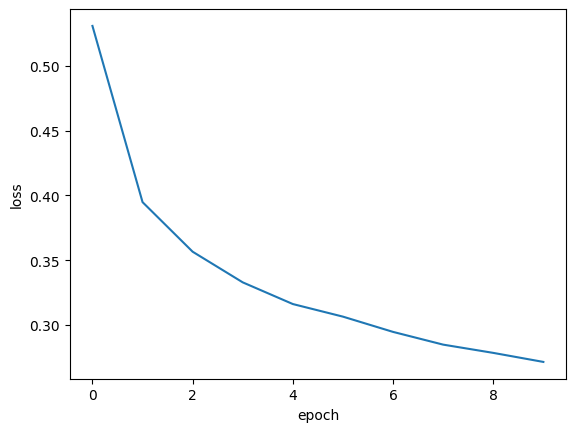

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)
plt.show()

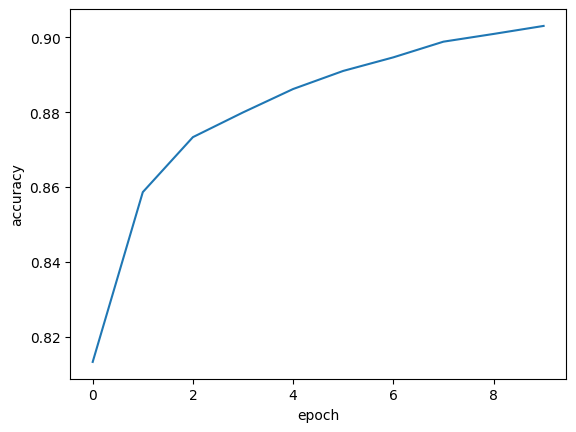

In [19]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()

In [20]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

/home/jotaesik/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


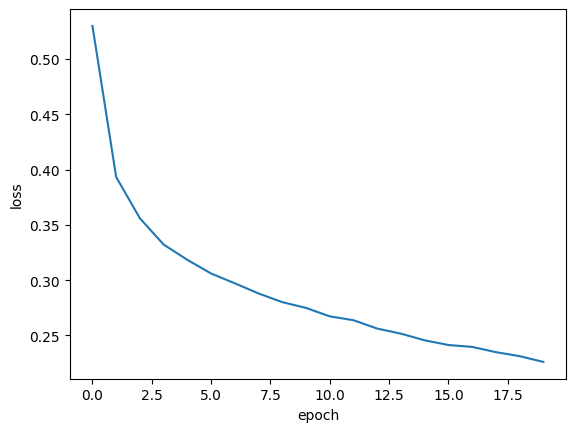

In [21]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-03', dpi=300)
plt.show()

## 검증 손실
* 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요합니다. 
* 따라서 앞에서처럼 훈련 세트의 손실만 그려서는 안됩니다. 

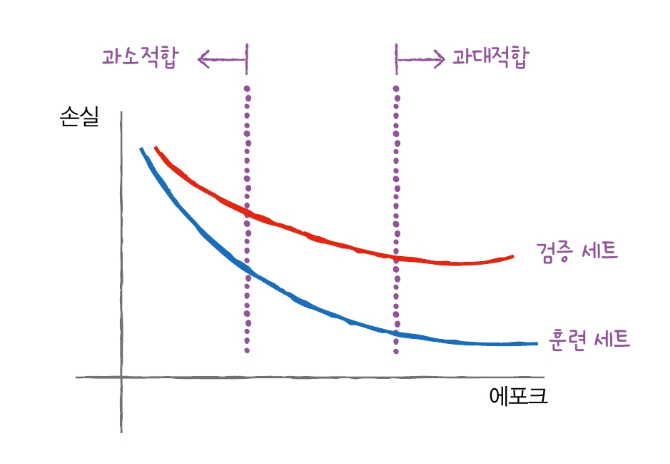

* 모델이 최적화하는 대상은 정확도가 아니라 손실 함수입니다. 이따금 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있습니다. 
* 따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫습니다. 

In [22]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7641 - loss: 0.6740 - val_accuracy: 0.8444 - val_loss: 0.4302
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8565 - loss: 0.4014 - val_accuracy: 0.8616 - val_loss: 0.3754
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8707 - loss: 0.3539 - val_accuracy: 0.8737 - val_loss: 0.3558
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8797 - loss: 0.3305 - val_accuracy: 0.8740 - val_loss: 0.3524
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8886 - loss: 0.3093 - val_accuracy: 0.8685 - val_loss: 0.3759
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8907 - loss: 0.3040 - val_accuracy: 0.8583 - val_loss: 0.4074
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8951 - loss: 0.2994 - val_accuracy: 0.8835 - val_loss: 0.3538
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9001 - loss: 0.2771 - 

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


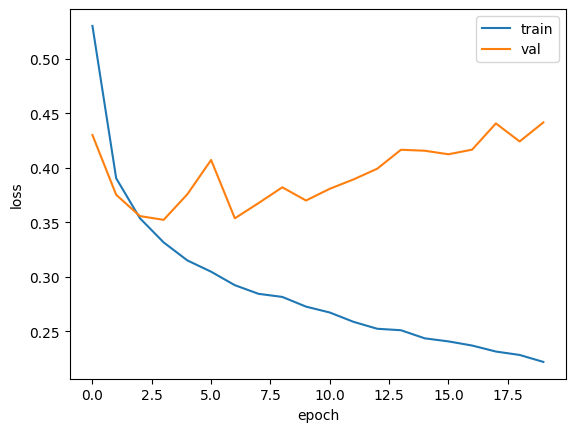

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()

* 5번째 에포크 만에 검증 손실이 상승하기 시작합니다. 
* 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어집니다. 
* 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것입니다. 

* 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 확인해보겠습니다. 
* 기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작합니다. 만약 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 좋은 선택입니다. 
* Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있습니다. 

In [24]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7714 - loss: 0.6619 - val_accuracy: 0.8442 - val_loss: 0.4391
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8535 - loss: 0.4055 - val_accuracy: 0.8588 - val_loss: 0.3829
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8657 - loss: 0.3717 - val_accuracy: 0.8690 - val_loss: 0.3633
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8816 - loss: 0.3265 - val_accuracy: 0.8782 - val_loss: 0.3334
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8895 - loss: 0.3014 - val_accuracy: 0.8798 - val_loss: 0.3355
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8916 - loss: 0.2848 - val_accuracy: 0.8670 - val_loss: 0.3495
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8939 - loss: 0.2824 - val_accuracy: 0.8809 - val_loss: 0.3239
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9025 - loss: 0.2646 - 

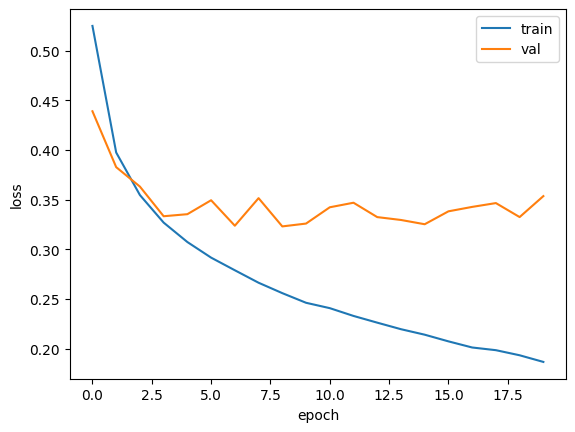

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()

## 드롭아웃
* 드롭아웃은 인공지능의 3대 거장 제프리 힌튼이 소개했습니다.
* 아래 그림처럼 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막습니다. 

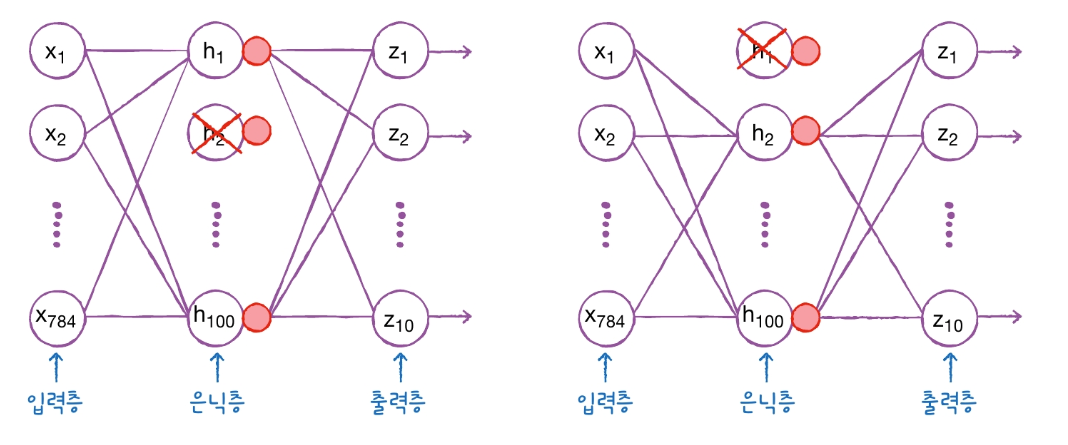

* 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 합니다. 
* 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것입니다. 

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
#30퍼를 끄겠다
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7302 - loss: 0.7694 - val_accuracy: 0.8400 - val_loss: 0.4354
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8356 - loss: 0.4552 - val_accuracy: 0.8544 - val_loss: 0.3955
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8475 - loss: 0.4153 - val_accuracy: 0.8591 - val_loss: 0.3790
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8579 - loss: 0.3853 - val_accuracy: 0.8684 - val_loss: 0.3514
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8641 - loss: 0.3658 - val_accuracy: 0.8677 - val_loss: 0.3546
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8675 - loss: 0.3615 - val_accuracy: 0.8773 - val_loss: 0.3390
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8723 - loss: 0.3478 - val_accuracy: 0.8788 - val_loss: 0.3350
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8751 - loss: 0.3413 - 

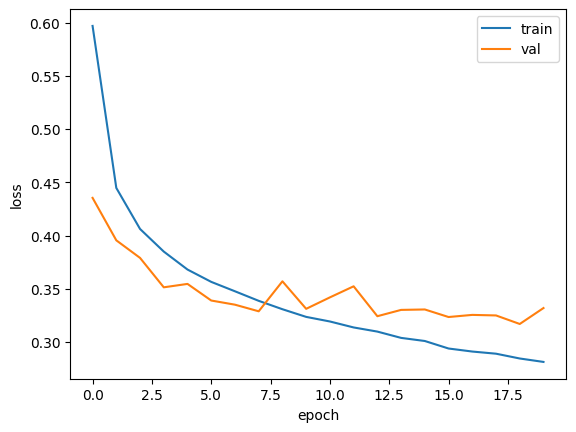

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()

## 모델 저장과 복원

In [45]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7333 - loss: 0.7632 - val_accuracy: 0.8419 - val_loss: 0.4271
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8348 - loss: 0.4527 - val_accuracy: 0.8630 - val_loss: 0.3827
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8492 - loss: 0.4120 - val_accuracy: 0.8590 - val_loss: 0.3835
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8591 - loss: 0.3839 - val_accuracy: 0.8605 - val_loss: 0.3685
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8638 - loss: 0.3680 - val_accuracy: 0.8692 - val_loss: 0.3565
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8699 - loss: 0.3574 - val_accuracy: 0.8726 - val_loss: 0.3454
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8734 - loss: 0.3440 - val_accuracy: 0.8765 - val_loss: 0.3410
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8779 - loss: 0.3325 - 

* 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공합니다. 
* 기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 h5일 경우 HDF5 포맷으로 저장합니다. 

In [46]:
model.save_weights('model-weights.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=model-weights.h5

model.weights

* 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공합니다. 
* 기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 h5일 경우 HDF5 포맷으로 저장합니다. 

In [22]:
model.save('model-whole.h5')

In [24]:
model = model_fn(keras.layers.Dropout(0.3))


In [25]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[ 0.04573797, -0.04910558, -0.04029437, ...,  0.05354281,
         -0.01867062,  0.05332084],
        [-0.06846019, -0.0217729 , -0.07980701, ...,  0.0047096 ,
          0.04639108,  0.03168784],
        [-0.01576516, -0.03422885,  0.07260524, ...,  0.03870681,
          0.00384291,  0.01711272],
        ...,
        [ 0.00226708, -0.00153054,  0.06368059, ..., -0.05727651,
         -0.06209108,  0.05767079],
        [-0.00143313, -0.02099831, -0.00757489, ..., -0.04889276,
         -0.07274923,  0.01817726],
        [ 0.01323286, -0.02407787, -0.04362851, ...,  0.05056717,
         -0.00660402, -0.03249661]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

* load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 합니다. 
* 그렇지 않으면 에러가 발생합니다. 여기에서는 model_fn() 함수를 사용해 동일한 모델을 만들어 사용했습니다. 

In [43]:
model.load_weights('model-weights.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model-weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [28]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[ 0.24180505,  0.02000456, -0.03505555, ...,  0.14932577,
         -0.0808037 ,  0.10357693],
        [ 0.21056263,  0.21406849, -0.01433415, ..., -0.05215047,
          0.10957947,  0.1519913 ],
        [-0.05617051, -0.37103084,  0.07973556, ...,  0.184228  ,
          0.2285428 , -0.04244294],
        ...,
        [-0.12198399, -0.05247418,  0.04167001, ..., -0.5234337 ,
          0.37053442,  0.37573117],
        [ 0.12239695, -0.16959623,  0.0622731 , ..., -0.40387487,
          0.6232919 ,  0.04256921],
        [-0.10192481, -0.41504735,  0.04223329, ..., -0.21423577,
          0.12852071,  0.04340189]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(100,) dtype=float32, numpy=
 array([-0.06414787, -0.3627148 , -0.02063095, -0.00361884,  0.38410825,
         0.03958732,  0.13356097,  0.07330318, -0.05972755,  0.4852454 ,
         0.5472394 ,  0.617633  ,  0.16008382,  0.6779821 ,  0.09738693

* 아래 옵션은 과학적 표기법을 변경하는 옵션입니다. 

In [47]:
import numpy as np

In [48]:
np.set_printoptions(precision=6, suppress=True)

In [49]:
model.predict(val_scaled)[0]

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [50]:
np.argmax(model.predict(val_scaled)[0])

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


8

In [51]:
model.predict(val_scaled)[0]

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [52]:
model.predict(val_scaled).shape

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(12000, 10)

* 모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이의 argmax() 함수를 사용합니다. 
* 이 함수는 배열에서 가장 큰 값의 인덱스를 반환합니다. 
* argmax() 함수의 axis=-1은 배열의 마지막 차원을 따라 최댓값을 선택합니다. 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됩니다. 

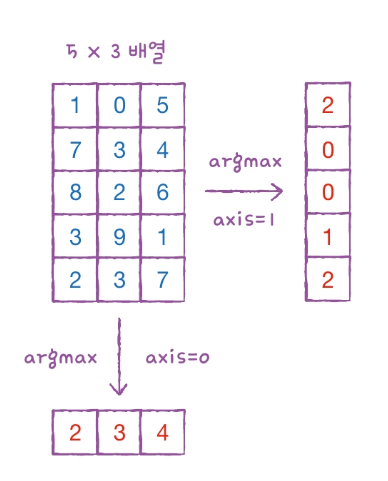

In [53]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8808333333333334


In [54]:
val_target

array([8, 8, 7, ..., 8, 8, 1], dtype=uint8)

In [55]:
val_labels

array([8, 8, 7, ..., 8, 8, 6])

In [57]:
model = keras.models.load_model('model-whole.keras')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

ValueError: File not found: filepath=model-whole.keras. Please ensure the file is an accessible `.keras` zip file.

In [58]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [59]:
model.save("model-weights.keras")

In [60]:
model.weights

[<KerasVariable shape=(784, 100), dtype=float32, path=sequential_10/dense_20/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential_10/dense_20/bias>,
 <KerasVariable shape=(100, 10), dtype=float32, path=sequential_10/dense_21/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_10/dense_21/bias>]

## 콜백
* 콜백함수란 어떤 이벤트에 의해 호출되어지는 함수를 의미하고 케라스에서는 훈련 과정 중간에 어떤 작업을 수행할 때 사용합니다. 
* keras.callbacks 패키지 아래에 있는 클래스입니다. 
* fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용합니다. 
* ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장합니다. 
    * 저장될 파일 이름은 best-model.h5로 지정하여 콜백을 적용해 보겠습니다. 

In [61]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras')

model.fit(train_scaled, train_target, epochs=20, verbose=1, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7364 - loss: 0.7616 - val_accuracy: 0.8388 - val_loss: 0.4375
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8399 - loss: 0.4419 - val_accuracy: 0.8606 - val_loss: 0.3814
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8500 - loss: 0.4096 - val_accuracy: 0.8652 - val_loss: 0.3617
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8591 - loss: 0.3833 - val_accuracy: 0.8714 - val_loss: 0.3607
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8609 - loss: 0.3752 - val_accuracy: 0.8740 - val_loss: 0.3467
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8703 - loss: 0.3515 - val_accuracy: 0.8773 - val_loss: 0.3382
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8703 - loss: 0.3490 - val_accuracy: 0.8799 - val_loss: 0.3289
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8741 - loss: 0.3338 - 

In [63]:
model = keras.models.load_model('best-model.keras')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.3188


[0.3208790421485901, 0.8852499723434448]

* 에포크의 횟수 만큼 훈련을 진행하다보면 과적합이 발생하기 때문에 어느 시점 이상은 훈련을 계속할 필요성이 없어집니다. 
* 이때 훈련을 중지하면 컴퓨터 자원과 시간을 절약할 수 있습니다. 
* 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료(ealry stopping)라고 부릅니다. 
* 조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중 하나로 생각할 수도 있습니다. 
* 케라스에서는 EarlyStopping 콜백 함수를 제공합니다. 
* patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지시킵니다. 
* restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌립니다. 

In [64]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7288 - loss: 0.7774 - val_accuracy: 0.8438 - val_loss: 0.4281
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8392 - loss: 0.4511 - val_accuracy: 0.8624 - val_loss: 0.3863
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8512 - loss: 0.4104 - val_accuracy: 0.8613 - val_loss: 0.3813
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8591 - loss: 0.3854 - val_accuracy: 0.8739 - val_loss: 0.3496
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8685 - loss: 0.3601 - val_accuracy: 0.8757 - val_loss: 0.3374
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8720 - loss: 0.3566 - val_accuracy: 0.8747 - val_loss: 0.3403
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8719 - loss: 0.3483 - val_accuracy: 0.8808 - val_loss: 0.3316
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8760 - loss: 0.3366 - 

In [65]:
print(early_stopping_cb.stopped_epoch)

8


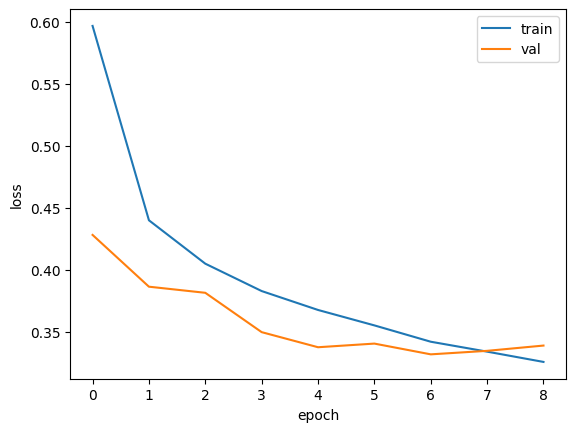

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()

In [67]:
model.evaluate(val_scaled, val_target)
# rnn 은 언어모델에 쓰인다

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8816 - loss: 0.3296


[0.3316417336463928, 0.8807500004768372]

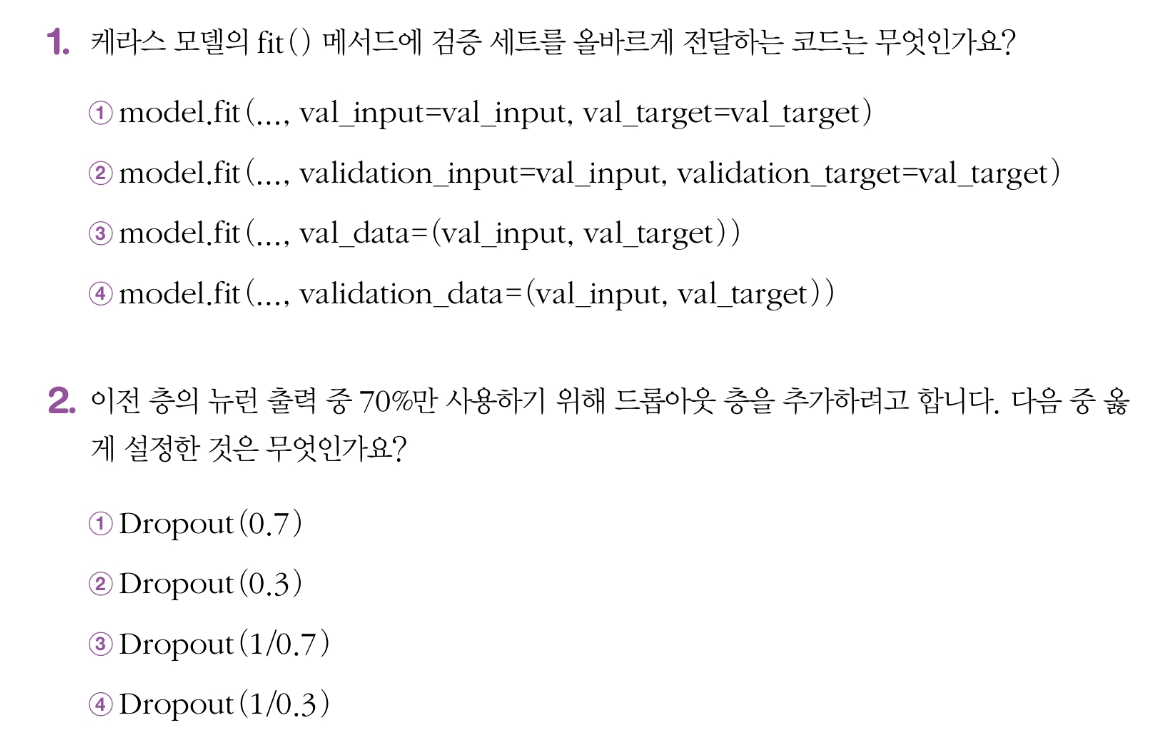

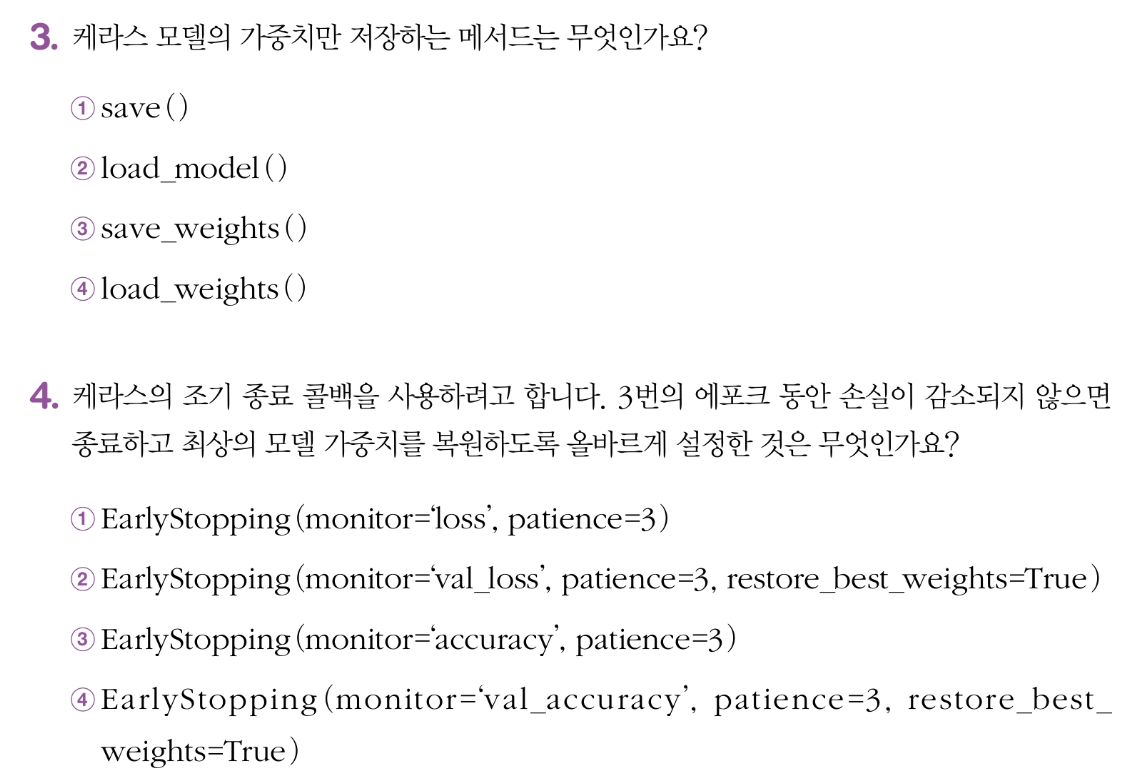